# 2-1 훈련 세트와 테스트 세트
훈련에 사용한 데이터로 모델을 평가하는 것은 적절하지 않다.
이를 위해 훈련데이터를 일부 떼어내 테스트 세트로 사용한다.


In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35+[0]*14
# 이때 하나의 데이터를 샘플이라고 한다. 위의 경우 49개의 샘플이 있는 것이다.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

슬라이싱을 이용해 첫번째부터 다섯번째까지의 샘플을 뽑는다.

In [4]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [5]:
# 훈련 세트로 입력값 중 0~34 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0~34 인덱스까지 사용
train_output = fish_target[:35]
# 테스트 세트로 입력값 중 35~마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35~마지막 인덱스까지 사용
test_output = fish_target[35:]

In [6]:
# 모델을 훈련
kn.fit(train_input, train_output)
kn.score(test_input, test_output)

0.0

## 샘플링 편향
훈련 세트와 테스트 세트를 나눴는데 각 세트에는 도미와 방어가 적절하게 섞여있어야 한다. 위의 경우 한쪽으로 치우쳤으므로 샘플링 편향이 일어났고 점수가 0점이 된 것이다.

이 작업을 간편하게 처리할 수 있는 라이브러리가 넘파이이다.

In [7]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [8]:
# 넘파이 배열의 크기 표시 (샘플 수, 특성 수)
print(input_arr.shape)

(49, 2)


input_arr와 target_arr의 값이 같은 위치에서 선택되어야 한다.
이 방법으로 아예 인덱스를 섞은 다음 input_arr와 target_arr에서 샘플을 선택하면 무작위로 훈련 세트를 나누는 셈이 된다.

In [9]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [10]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [11]:
train_input = input_arr[index[:35]]
train_output  = target_arr[index[:35]]

In [12]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [13]:
test_input = input_arr[index[35:]]
test_output = target_arr[index[35:]]

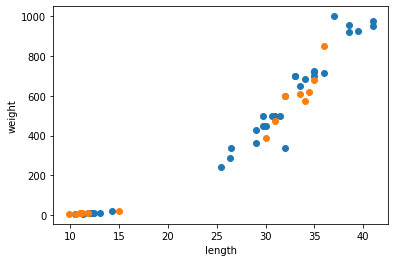

In [14]:
# 잘 섞였는지 확인
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 두번째 머신러닝 프로그램

In [15]:
kn = kn.fit(train_input, train_output)
kn.score(test_input, test_output)

1.0

In [16]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [17]:
test_output

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

위의 결과값을 보면 모두 넘파이 배열로 표시된다.
사이킷런 모델의 입력과 출력은 모두 넘파이 배열이다.

# 2-2 데이터 전처리


In [18]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [20]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
# 타겟 데이터
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [21]:
# 사이킷런으로 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(fish_data, fish_target, random_state=42)

In [26]:
test_output

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

빙어의 비율이 조금 모자라다. => 샘플링 편향이 발생     
이러한 문제는 일부 클래스의 개수가 적을 때 발생한다.     
빙어와 도미의 샘플을 적절하게 섞어야 한다.

In [27]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [28]:
test_output

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

준비한 데이터로 k-최근접 이웃을 훈련해보자.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_output)
kn.score(test_input, test_output)

1.0

문제가 제기되었던 25cm, 150g의 도미를 예측해보자.

In [30]:
print(kn.predict([[25,150]]))

[0.]


1(도미)로 결과값을 예상했지만 빙어로 예측을 했다.    
이 문제를 확인해보기 위해 산점도를 그려보자.

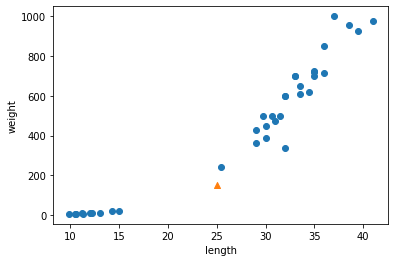

In [31]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25,150, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

k-최근접 이웃은 주변의 샘플 중 다수인 클래스를 예측으로 사용한다.    
KNeighborsClassifier은 주어진 샘플에서 가장 가까운 이웃을 찾아주는 메서드를 제공한다.

In [32]:
distance, indexes = kn.kneighbors([[25,150]])

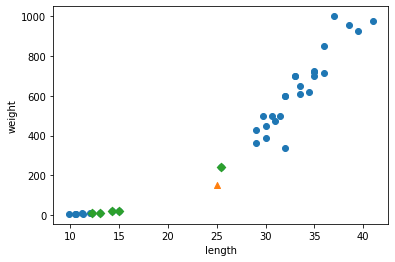

In [34]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

삼각형 샘플에 가장 가까운 5개의 샘플을 다이아몬드로 표시한다. 그 결과 가장 가까운 이웃은 도미밖에 없다.

In [36]:
train_output[indexes], distance

(array([[1., 0., 0., 0., 0.]]),
 array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]))

도미와의 거리는 92인데 빙어와의 거리는 그보다 더 큰 130이다.   
이와 같은 결과가 나타난 이유는 x축은 범위가 좁고, y축의 범위가 넓기 때문에 y축으로 조금만 멀어져도 큰 값으로 계산된다.

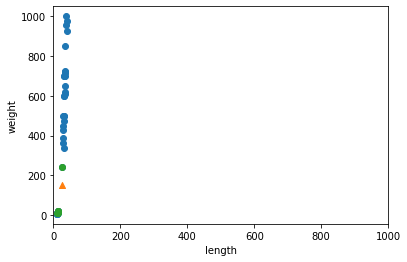

In [37]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1])
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

두 특성의 값이 놓인 범위가 매우 다르다는 것 = 두 특성의 스케일이 다르다.
데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다. 특히 알고리즘이 거리 기반일 경우 그렇다. 이런 알고리즘을 제대로 이용하려면 특성값을 일정한 기준으로 맞춰 줘야 한다. 이런 작업을 데이터 전처리라고 부른다.     
가장 널리 사용하는 전처리 방법 중 하나는 **표준점수**이다. 표준점수는 각 특성값이 0에서 표준편차의 몇 배 만큼 떨어져 있는지 나타낸다.     
계산하는 방법은 평균을 빼고 표준편차를 나누어준다.

In [39]:
mean = np.mean(train_input, axis=0) # 평균 계산
std = np.std(train_input, axis = 0) # 표준 편차 계산
# axis = 0 인 이유는 각 특성별로 계산하기 위해서. 각 열의 통계를 계산
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


이제 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환한다.

In [40]:
train_scaled = (train_input-mean)/std # 넘파이가 알아서 각 행마다 계산을 해줌 = 브로드캐스팅

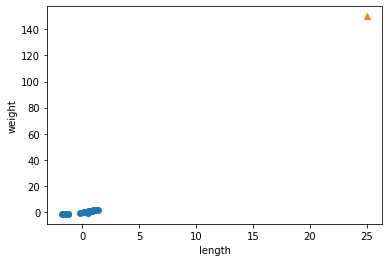

In [41]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

샘플을 전처리 하지 않았기 때문에 이러한 현상이 발생    
샘플을 동일한 기준으로 전처리를 한다.

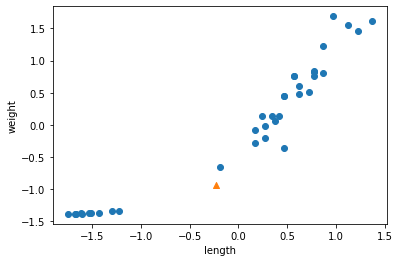

In [42]:
new = ([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이제 다시 훈련을 시켜보자.

In [43]:
kn.fit(train_scaled, train_output)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

훈련을 마치고 테스트 세트로 평가할때 주의해야 할 점은 테스트 샘플도 훈련 세트의 평균과 표준 편차로 변환해야 한다.

In [44]:
test_scaled = (test_input-mean)/std
kn.score(test_scaled, test_output)

1.0

In [45]:
# [25, 150] 도미에 대한 예측
print(kn.predict([new]))

[1.]


전처리를 통해서 k-최근접 이웃 알고리즘이 올바르게 거리를 측정했는지 확인해보자.

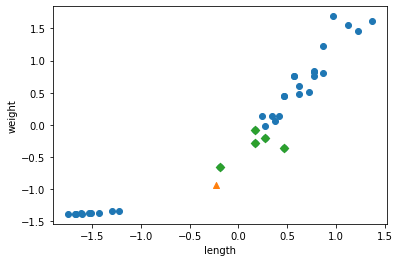

In [47]:
distance, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()